In [116]:
import pandas as pd
import numpy as np
import math
import scipy as sp

from scipy.stats import norm
from scipy.stats import truncnorm
from scipy.special import gamma
from sklearn.preprocessing import normalize

In [ ]:
## Binary Probit estimation with Bayesian Approach

In [ ]:
# (NOT) hiearchical approach based on James and Chib (1993)

In [30]:
# from sklearn import datasets, linear_model
# diabetes = datasets.load_diabetes()

# # Use only one feature
# diabetes_X = diabetes.data[:, np.newaxis, 2]

# # Split the data into training/testing sets
# X = diabetes.data # diabetes_X[:-20]

# # Split the targets into training/testing sets
# y = diabetes.target
# y = y - np.mean(y)
# y = y > 100

In [135]:
def convert_onehot_train(df,cols):
    di = {}
    for col in cols:
        di[col] = df[col].unique()


    for col in cols:
        df[di[col]] = pd.get_dummies(df[col])

    return df,reduce(lambda a,b:a+b,map(lambda k:di[k].tolist(),di))

def accuracy(beta,x,y):
    prediction = norm.cdf(np.matmul(x,beta)) > 0.5
    prediction = prediction.astype(int)
    return np.sum(prediction == y)*100./y.size


In [338]:
def drawZ(beta,X,y):
    # draw Z values based on equation (6)
    Z = np.zeros(y.shape)
    for i in range(0,y.shape[0]):
        if y[i]==1:
            mean = np.matmul(X[i,].T, beta)
            a = -mean
            b = np.inf
            Z[i] = truncnorm.rvs(a,b,loc=mean,scale=1)
        else:
            mean = np.matmul(X[i,].T, beta)
            a = -np.inf
            b = -mean
            Z[i] = truncnorm.rvs(a,b,loc=mean,scale=1)
    return Z
        

# What if the distribution mean is far from 0 and we cannot
# get a point in the non trucated area?

In [337]:
truncnorm.rvs(-0.2,np.inf,loc=20,scale=100)

107.25474100686903

In [339]:
def drawBeta(B0,X,Z, beta0):
    
    Bn = np.linalg.inv(np.linalg.inv(B0)+np.matmul(X.T,X))
    beta_tilda = np.matmul(Bn,(np.matmul(np.linalg.inv(B0),beta0)+np.matmul(X.T,Z)))
    
    return sp.stats.multivariate_normal.rvs(beta_tilda, Bn, 1)

In [345]:


def simulateProbit(X,y,B0,n):
    beta_s = []
    B0 = np.identity(X.shape[1])   # hyper parameter
    XXinv = np.linalg.inv(np.matmul(X.T,X))
    Xy = np.matmul(X.T,y)
    beta0 = np.matmul(XXinv,Xy)
    beta = beta0.copy()
    for i in range(0,n):
        
        Z = drawZ(beta,X,y)
        beta = drawBeta(B0,X,Z,beta0)
        print "accuracy",accuracy(beta,X,y)
        beta_s.append(beta)
        #print beta
        
    return beta, beta_s
        
        
    

In [346]:
# use cleaned version of Titanic survival data

# data = pd.read_csv('train_jj.csv')
# y = data['Survived']
# X = data[['Pclass','Sex', 'SibSp', 'Parch', 'Fare']]

df = pd.read_csv('train_jj.csv')
df,new_cols = convert_onehot_train(df,['Pclass','Sex'])
y = df['Survived']
columns = df.columns.tolist()
columns = filter(lambda l:l not in ['Pclass','Sex','Survived','male',1],columns)
x = df[columns]
x['bias'] = 1.

x = x.as_matrix()
#print np.max(x,axis=0)
#x = x / np.max(x,axis=0)
y = y.as_matrix()

beta, beta0 = simulateProbit(x,y,B0, 1000)


/Users/sigho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


accuracy 76.430976431
accuracy 79.2368125701
accuracy 78.7878787879
accuracy 79.1245791246
accuracy 78.7878787879
accuracy 79.797979798
accuracy 79.6857463524
accuracy 79.797979798
accuracy 79.5735129068
accuracy 79.012345679
accuracy 78.9001122334
accuracy 79.012345679
accuracy 79.2368125701
accuracy 79.3490460157
accuracy 79.3490460157
accuracy 79.012345679
accuracy 79.2368125701
accuracy 78.22671156
accuracy 78.0022446689
accuracy 79.5735129068
accuracy 79.3490460157
accuracy 79.5735129068
accuracy 79.2368125701
accuracy 78.9001122334
accuracy 80.0224466891
accuracy 79.6857463524
accuracy 79.797979798
accuracy 79.012345679
accuracy 79.9102132435
accuracy 80.5836139169
accuracy 79.9102132435
accuracy 79.4612794613
accuracy 78.5634118967
accuracy 78.3389450056
accuracy 76.8799102132
accuracy 79.2368125701
accuracy 79.5735129068
accuracy 79.2368125701
accuracy 79.4612794613
accuracy 80.0224466891
accuracy 79.3490460157
accuracy 78.3389450056
accuracy 79.5735129068
accuracy 79.461279461

accuracy 80.0224466891
accuracy 79.797979798
accuracy 79.5735129068
accuracy 79.4612794613
accuracy 79.2368125701
accuracy 79.9102132435
accuracy 80.2469135802
accuracy 79.6857463524
accuracy 79.5735129068
accuracy 79.4612794613
accuracy 78.6756453423
accuracy 78.4511784512
accuracy 79.4612794613
accuracy 79.4612794613
accuracy 79.4612794613
accuracy 78.7878787879
accuracy 79.012345679
accuracy 78.9001122334
accuracy 79.3490460157
accuracy 79.5735129068
accuracy 80.2469135802
accuracy 79.9102132435
accuracy 79.6857463524
accuracy 79.012345679
accuracy 79.4612794613
accuracy 79.2368125701
accuracy 78.9001122334
accuracy 79.5735129068
accuracy 77.3288439955
accuracy 79.797979798
accuracy 78.3389450056
accuracy 79.9102132435
accuracy 80.5836139169
accuracy 79.9102132435
accuracy 79.3490460157
accuracy 79.797979798
accuracy 79.5735129068
accuracy 79.3490460157
accuracy 79.6857463524
accuracy 80.2469135802
accuracy 79.6857463524
accuracy 79.9102132435
accuracy 80.2469135802
accuracy 80.5836

accuracy 79.3490460157
accuracy 79.3490460157
accuracy 78.6756453423
accuracy 77.4410774411
accuracy 78.9001122334
accuracy 78.9001122334
accuracy 79.9102132435
accuracy 79.3490460157
accuracy 79.5735129068
accuracy 79.1245791246
accuracy 78.6756453423
accuracy 79.5735129068
accuracy 79.3490460157
accuracy 79.2368125701
accuracy 79.2368125701
accuracy 79.2368125701
accuracy 79.2368125701
accuracy 80.0224466891
accuracy 79.3490460157
accuracy 80.8080808081
accuracy 80.1346801347
accuracy 79.797979798
accuracy 80.2469135802
accuracy 80.6958473625
accuracy 80.1346801347
accuracy 79.797979798
accuracy 79.3490460157
accuracy 80.0224466891
accuracy 79.797979798
accuracy 80.8080808081
accuracy 80.3591470258
accuracy 79.3490460157
accuracy 79.2368125701
accuracy 79.1245791246
accuracy 78.9001122334
accuracy 78.4511784512
accuracy 77.8900112233
accuracy 78.3389450056
accuracy 78.1144781145
accuracy 78.3389450056
accuracy 80.1346801347
accuracy 80.0224466891
accuracy 78.6756453423
accuracy 80.02

In [235]:
df.to_csv('titanicClean.csv')

In [218]:
#df

<IPython.core.display.Javascript object>


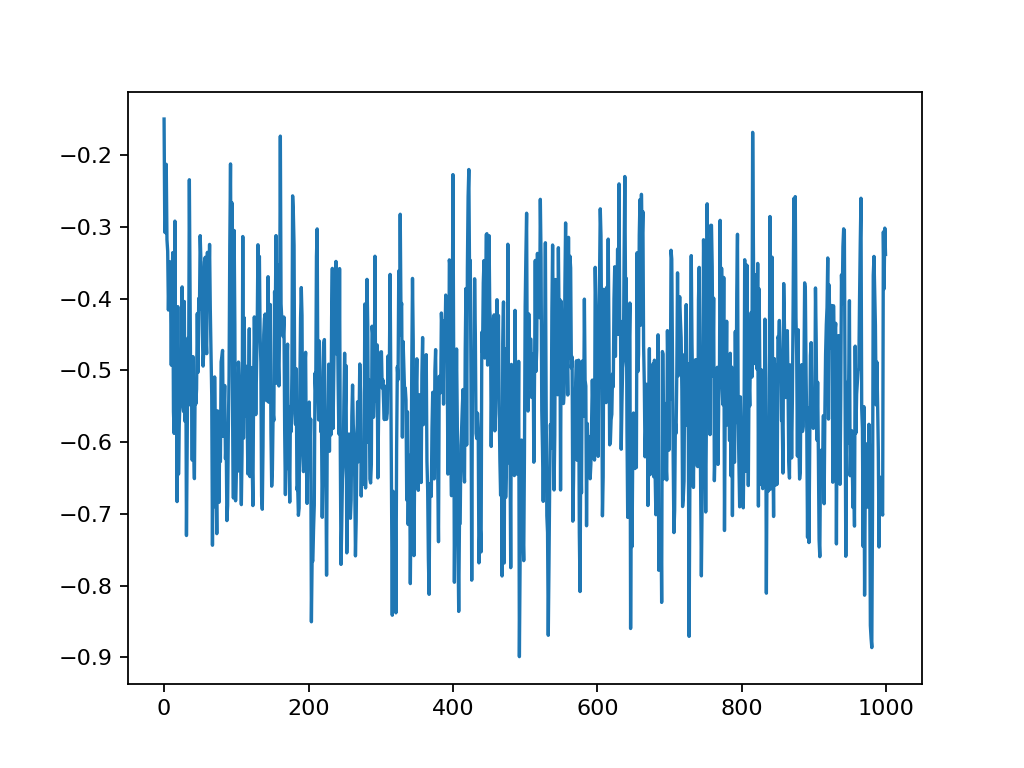

In [351]:
import matplotlib.pyplot as plt
%matplotlib notebook
x0 = range(0,len(beta0))
plt.plot(x0, map(lambda l:l[4],beta0), '-')

<IPython.core.display.Javascript object>


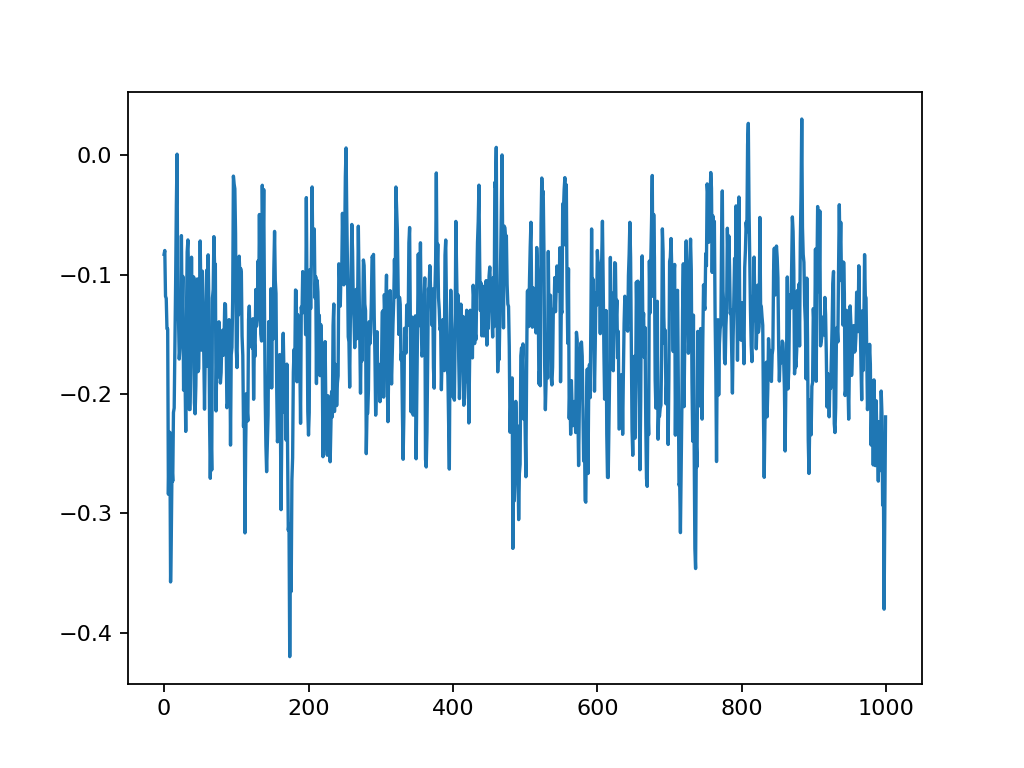

In [353]:
import matplotlib.pyplot as plt
%matplotlib notebook
x0 = range(0,len(beta0))
plt.plot(x0, map(lambda l:l[0],beta0), '-')
#plt.plot(x0, map(lambda l:l[1],beta0), '.')
#plt.plot(x0, map(lambda l:l[2],beta0), '.')
#plt.plot(x0, map(lambda l:l[3],beta0), '.')
#plt.plot(x0, map(lambda l:l[4],beta0), '.')

<IPython.core.display.Javascript object>


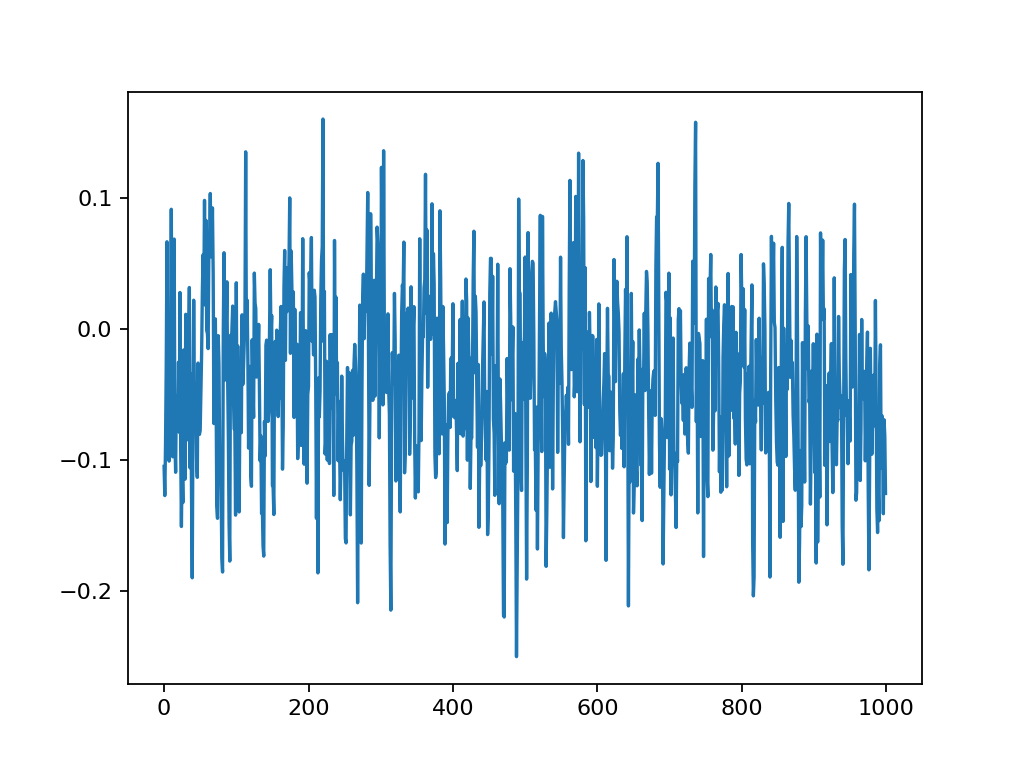

In [354]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[1],beta0), '-')

<IPython.core.display.Javascript object>


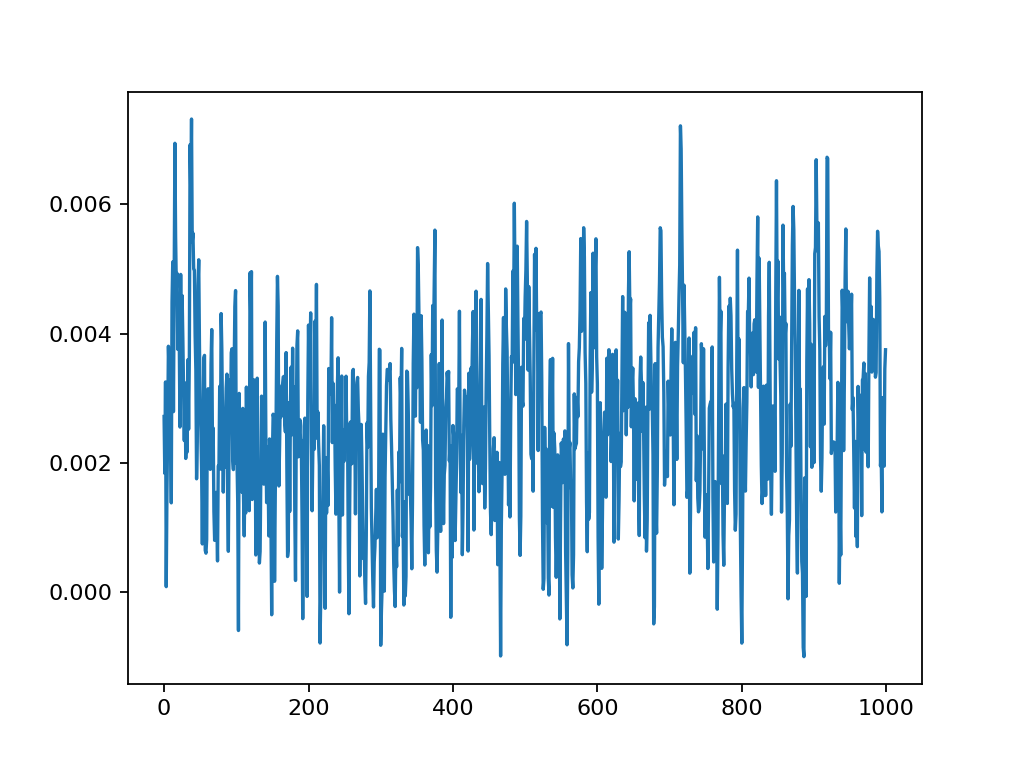

In [355]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[2],beta0), '-')

<IPython.core.display.Javascript object>


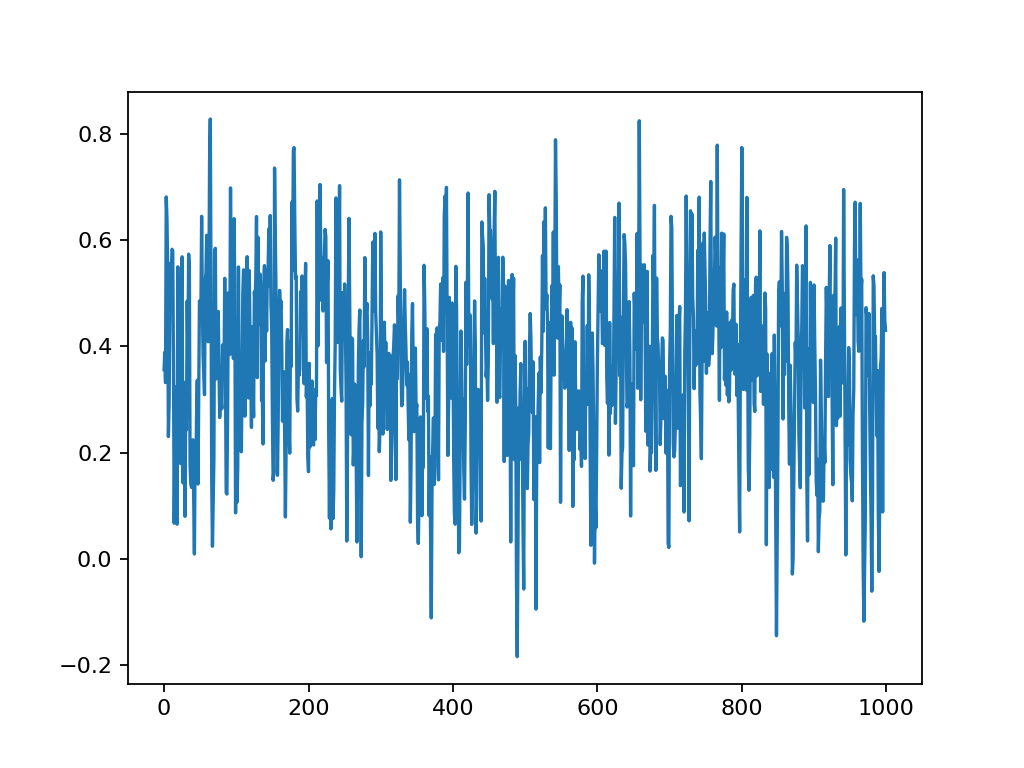

In [356]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[3],beta0), '-')

<IPython.core.display.Javascript object>


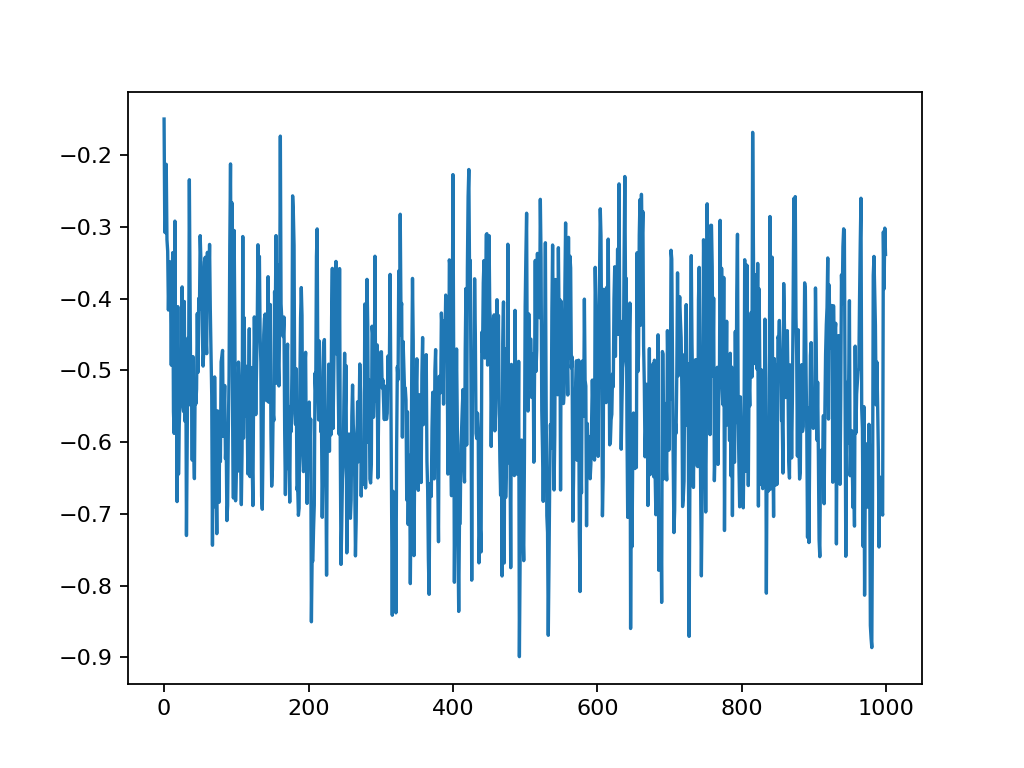

In [357]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[4],beta0), '-')

<IPython.core.display.Javascript object>


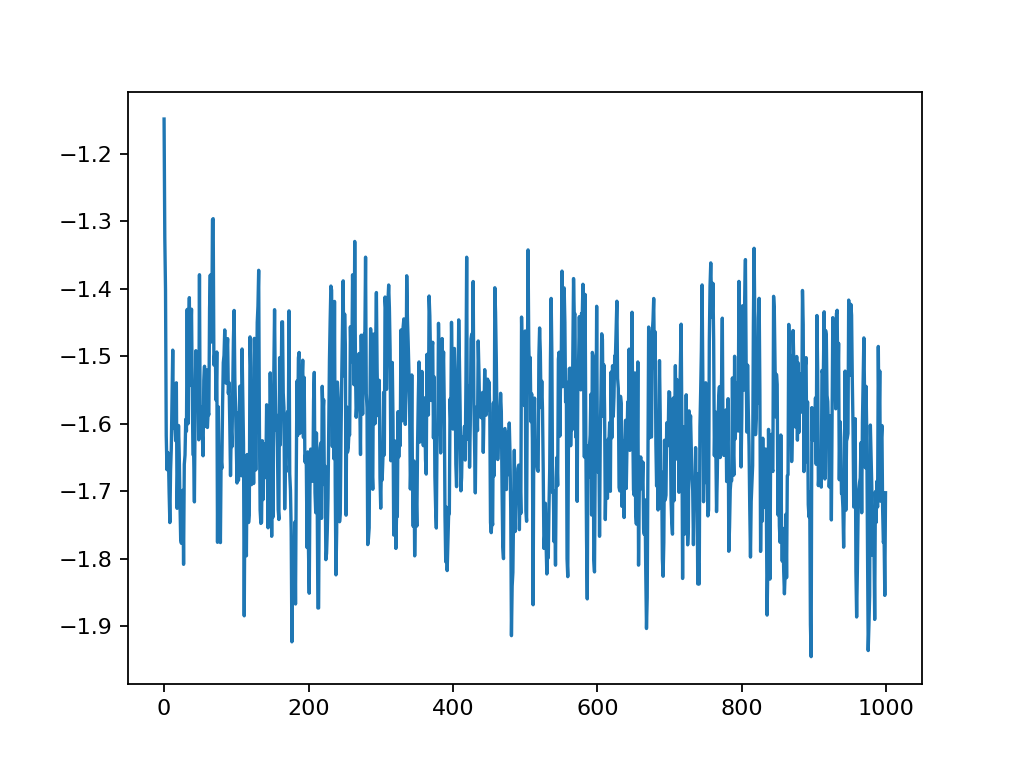

In [358]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[5],beta0), '-')

<IPython.core.display.Javascript object>


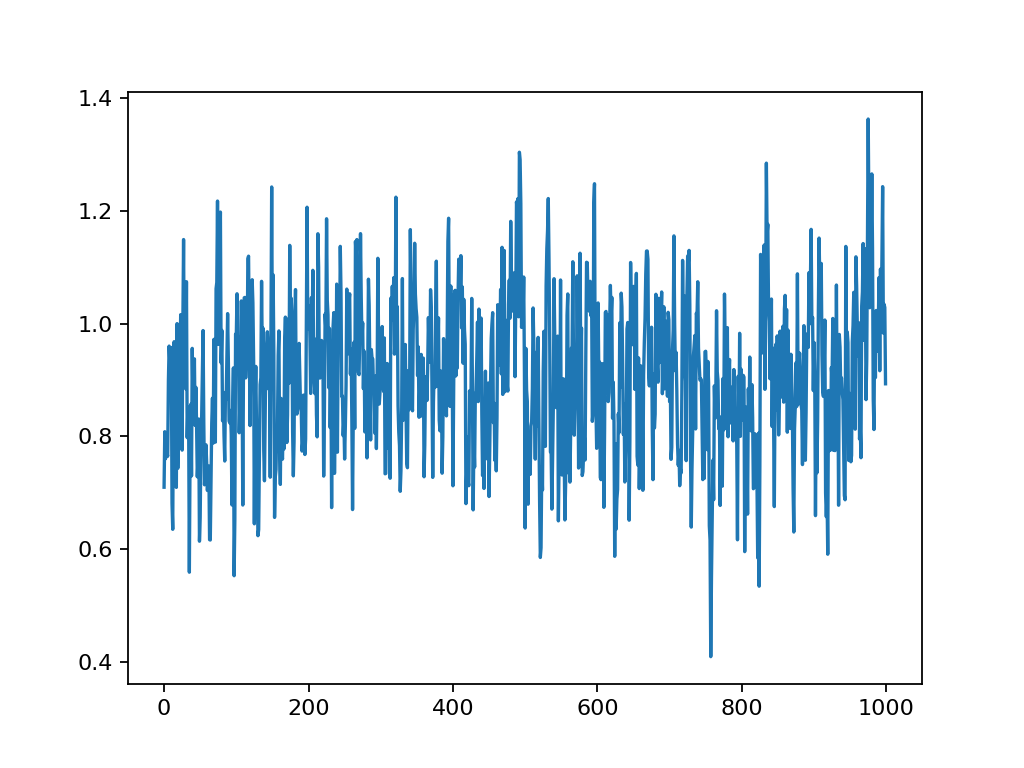

In [359]:
%matplotlib notebook
plt.plot(x0, map(lambda l:l[6],beta0), '-')